In [19]:
import pandas as pd

df = pd.read_csv('sampled_data.csv')

df_info = df.info()
df_nulls = df.isnull().sum()
df_describe = df.describe()
df_head = df.head()

df_info, df_nulls, df_describe, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   image_url_1                  500 non-null    object 
 1   category                     500 non-null    object 
 2   style                        494 non-null    object 
 3   colors                       478 non-null    object 
 4   gender                       495 non-null    object 
 5   pattern                      421 non-null    object 
 6   occasion                     494 non-null    object 
 7   accessory_type               0 non-null      float64
 8   more_attributes              155 non-null    object 
 9   bag_type                     0 non-null      float64
 10  belt_type                    0 non-null      float64
 11  material                     203 non-null    object 
 12  tops_fit                     240 non-null    object 
 13  sleeve_type         

(None,
 image_url_1                      0
 category                         0
 style                            6
 colors                          22
 gender                           5
 pattern                         79
 occasion                         6
 accessory_type                 500
 more_attributes                345
 bag_type                       500
 belt_type                      500
 material                       297
 tops_fit                       260
 sleeve_type                    256
 tops_length                    264
 overclothes_closure            456
 blazer_neckline_type           493
 underarm_sleeve_length         479
 neckline_type                  253
 sleeve_length                  263
 heels_width                    500
 heels_height                   499
 boots-shoe_type                500
 shoe_material                  500
 bracelet_type                  500
 overclothes_neckline_type      464
 overclothes_type               486
 waist_type          

In [20]:
# define labels
categorical_columns = ["category", "colors", "style", "gender", "occasion", "pattern"]

df[categorical_columns] = df[categorical_columns].fillna("missing")

df_nulls = df.isnull().sum()
df_nulls

# drop columns with missing values that are not relevant for clothing
df = df.dropna(axis=1)

df_nulls = df.isnull().sum()
df_nulls

image_url_1    0
category       0
style          0
colors         0
gender         0
pattern        0
occasion       0
barcode        0
brand          0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

# save encoders
import pickle

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)


In [22]:
df

image_url_1  category  style  \
0    https://fotos.skm.be/article/489205/489205_02_...        14      2   
1    https://fotos.skm.be/article/507927/507927_01_...        18      2   
2    https://fotos.skm.be/article/505938/505938_01_...        24      1   
3    https://fotos.skm.be/article/479883/479883_01_...        15      3   
4    https://fotos.skm.be/article/483726/483726_01_...         4      3   
..                                                 ...       ...    ...   
495  https://fotos.skm.be/article/506656/506656_01_...         0      1   
496  https://fotos.skm.be/article/511264/511264_01_...         4      2   
497  https://fotos.skm.be/article/499751/499751_01_...        14      2   
498  https://fotos.skm.be/article/478799/478799_02_...         2      2   
499  https://fotos.skm.be/article/505481/505481_01_...        20      2   

     colors  gender  pattern  occasion         barcode          brand  
0       113       0       77        56  48920502040101         ETERNA  
1        65       0       30        59  50792701020101         Geisha  
2        86       0       58        55  50593801040101           TONI  
3        40       0       80        25  47988301030101          Nümph  
4        81       0       37        29  48372601080101        Verpass  
..      ...     ...      ...       ...             ...            ...  
495      93       0       71        46  50665601040101      Marc Cain  
496      14       0       77         2  51126401030101   Liu Jo Sport  
497       1       0       44        56  49975101020101           ONLY  
498      31       0       55        48  47879902020101           ONLY  
499       4       0       81        53  50548101050101  Betty Barclay  

[500 rows x 9 columns]

In [ ]:
""" import os
import requests
from PIL import Image
from io import BytesIO

# create a directory to store the images
os.makedirs("images", exist_ok=True)

# download the images
def download_and_process_images(url, save_path):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        image = Image.open(BytesIO(response.content, ))
        image.save(save_path)

        return save_path
    except Exception as e:
        print(f"failed to download image {url}: {e}")
        return None
    
# download the images

for idx, row in df.iterrows():
    image_url = row["image_url_1"]
    image_path = f"images/{row['barcode']}.jpg"  
    
    img = download_and_process_images(image_url, image_path) """

' import os\nimport requests\nfrom PIL import Image\nfrom io import BytesIO\n\n# create a directory to store the images\nos.makedirs("new", exist_ok=True)\n\n# download the images\ndef download_and_process_images(url, save_path):\n    try:\n        response = requests.get(url, timeout=10)\n        response.raise_for_status()\n        image = Image.open(BytesIO(response.content, ))\n        image.save(save_path)\n\n        return save_path\n    except Exception as e:\n        print(f"failed to download image {url}: {e}")\n        return None\n    \n# download the images\n\nfor idx, row in df.iterrows():\n    image_url = row["image_url_1"]\n    image_path = f"new/{row[\'barcode\']}.jpg"  \n    \n    img = download_and_process_images(image_url, image_path) '

In [28]:
from sklearn.preprocessing import MinMaxScaler

scalers = {}

# Normalize each label column and store the scaler
for col in ["category", "colors", "style", "gender", "occasion", "pattern"]:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])
    scalers[col] = scaler  # Store the fitted scaler in the dictionary for later use in the pipeline 

In [27]:
import os

# specify the folder path
folder_path = 'images/'

# get the list of files in the folder
files_in_folder = os.listdir(folder_path)

# filter the dataframe to keep only the rows where the 'Name' column matches the files in the folder
df = df[df["barcode"].astype(str).add(".jpg").isin(files_in_folder)]
print(df)


                                           image_url_1  category  style  \
0    https://fotos.skm.be/article/489205/489205_02_...      0.56  0.250   
1    https://fotos.skm.be/article/507927/507927_01_...      0.72  0.250   
2    https://fotos.skm.be/article/505938/505938_01_...      0.96  0.125   
3    https://fotos.skm.be/article/479883/479883_01_...      0.60  0.375   
4    https://fotos.skm.be/article/483726/483726_01_...      0.16  0.375   
..                                                 ...       ...    ...   
495  https://fotos.skm.be/article/506656/506656_01_...      0.00  0.125   
496  https://fotos.skm.be/article/511264/511264_01_...      0.16  0.250   
497  https://fotos.skm.be/article/499751/499751_01_...      0.56  0.250   
498  https://fotos.skm.be/article/478799/478799_02_...      0.08  0.250   
499  https://fotos.skm.be/article/505481/505481_01_...      0.80  0.250   

       colors  gender   pattern  occasion         barcode          brand  
0    0.795775     0.0  0

In [29]:
scalers

{'category': MinMaxScaler(),
 'colors': MinMaxScaler(),
 'style': MinMaxScaler(),
 'gender': MinMaxScaler(),
 'occasion': MinMaxScaler(),
 'pattern': MinMaxScaler()}

In [30]:
df.drop(columns=["image_url_1", "brand"], inplace=True)

In [31]:
df.to_csv("processed_data.csv", index=False)

Image shape: torch.Size([3, 256, 256])
Labels: tensor([0.9600, 0.2500, 0.0845, 0.0000, 0.8256, 0.0847])


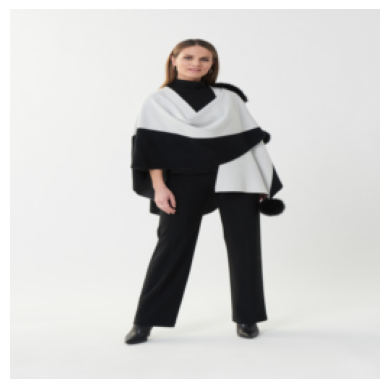

In [ ]:
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset
import torch

class FashionDataset(Dataset):
    def __init__(self, csv_file, image_folder, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_folder = image_folder
        self.transform = transform

        # Extract image paths and multi-label targets
        self.image_paths = self.data["barcode"].astype(str) + ".jpg"
        self.labels = self.data.iloc[:, 0:-1].values
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_paths[idx])
        
        # Check if the image file exists
        if not os.path.exists(img_path):
            print(f"Image file {img_path} does not exist.")
            return None, None
        
        # load the image and transform
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        # Convert labels to tensor (multi-label classification)
        labels = torch.tensor(self.labels[idx], dtype=torch.float32)
        
        return image, labels

# Define image transformations
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor()
])

# Load Dataset
dataset = FashionDataset(csv_file="processed_data.csv", image_folder="images/", transform=image_transforms)

# Test Dataset Loading
image, labels = dataset[9]
if image is not None and labels is not None:
    print("Image shape:", image.shape)
    print("Labels:", labels)

    import matplotlib.pyplot as plt
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")  
    plt.show()
else:
    print("Image or labels not found.")


In [46]:
from torch.utils.data import DataLoader, random_split

# Set train-test split ratio
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")
print(f"Training batches: {len(train_loader)}, Test batches: {len(test_loader)}")

Training samples: 395, Test samples: 99
Training batches: 13, Test batches: 4


In [47]:
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self, num_classes):
        super(FashionCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(256 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes) 
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = torch.sigmoid(self.fc3(x))
        return x

# Number of labels from CSV
num_classes = dataset.labels.shape[1]
model = FashionCNN(num_classes)
model

FashionCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=6, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [48]:
import torch.optim as optim

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to the device
model.to(device)

# Define Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training Loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to the device

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")

print("Finished Training")


Using device: cuda
Epoch 1 - Training loss: 0.6786161569448618
Epoch 2 - Training loss: 0.6248719875629132
Epoch 3 - Training loss: 0.6078677727625921
Epoch 4 - Training loss: 0.596610215994028
Epoch 5 - Training loss: 0.5820241157825177
Epoch 6 - Training loss: 0.5725479676173284
Epoch 7 - Training loss: 0.5651821310703571
Epoch 8 - Training loss: 0.5586201365177448
Epoch 9 - Training loss: 0.548540459229396
Epoch 10 - Training loss: 0.5335952777128953
Finished Training


In [49]:
def denormalize_labels(normalized_labels, scalers, columns):
    """
    Convert normalized labels back to original values.

    Args:
        normalized_labels (numpy array): The scaled labels from dataset
        scalers (dict): Dictionary of fitted MinMaxScalers for each label column
        columns (list): List of label column names in the original dataset

    Returns:
        list: Denormalized labels
    """
    denormalized = []
    for i, col in enumerate(columns):
        col = columns[i]
        original_value = scalers[col].inverse_transform([[normalized_labels[i]]])[0][0]
        denormalized.append(original_value)
    
    return denormalized

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# select a random sample from the dataset
sample_idx = np.random.randint(len(train_dataset))
image, normalized_labels = train_dataset[sample_idx]
print(normalized_labels)

tensor([0.4800, 0.0000, 0.2958, 0.3333, 0.9884, 0.7966])


In [63]:
def jaccard_index(y_true, y_pred, threshold=0.5):
    """
    Computes Jaccard Index (IoU) for multi-label classification.

    Args:
    - y_true (Tensor): Ground truth labels (batch_size, num_classes), binary (0s and 1s).
    - y_pred (Tensor): Model raw predictions (batch_size, num_classes), sigmoid outputs.
    - threshold (float): Decision threshold to binarize predictions (default 0.5).

    Returns:
    - Jaccard score (float): Mean Jaccard index across all samples in the batch.
    """
    y_pred = (y_pred > threshold).float()  # Convert probabilities to binary labels
    intersection = (y_true * y_pred).sum(dim=1)  # Element-wise AND
    union = ((y_true + y_pred) > 0).sum(dim=1)  # Element-wise OR

    jaccard_scores = intersection / (union + 1e-6)  # Add epsilon to avoid division by zero
    return jaccard_scores.mean().item()  # Average over batch

In [64]:
# During validation phase:
model.eval()
jaccard_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        jaccard = jaccard_index(labels, torch.sigmoid(outputs))
        jaccard_scores.append(jaccard)

avg_jaccard = sum(jaccard_scores) / len(jaccard_scores)
print(f"Validation Jaccard Index: {avg_jaccard:.4f}")

Validation Jaccard Index: 0.4360
